In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Basic info

In [56]:
file_path = "customer_segmentation.csv"
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (2240, 29)

Column names:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Data types:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        in

### Handle Missing Values & Data Cleaning

In [57]:
# Comprehensive Missing Data Analysis
print("="*60)
print("MISSING DATA ANALYSIS FOR DECISION MAKING")
print("="*60)

# Calculate missing data percentage
total_rows = len(df)
missing_income = df['Income'].isnull().sum()
missing_percentage = (missing_income / total_rows) * 100

print(f"Dataset size: {total_rows:,} customers")
print(f"Missing Income values: {missing_income}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# Analyze pattern of missing data
print(f"\n{'='*40}")
print("MISSING DATA PATTERN ANALYSIS:")
print(f"{'='*40}")

# Check if missing income is random or systematic
print("\n1. Missing Income by Education Level:")
education_missing = df.groupby('Education')['Income'].apply(lambda x: x.isnull().sum())
education_total = df.groupby('Education').size()
education_missing_pct = (education_missing / education_total * 100).round(2)

for edu in education_missing.index:
    print(f"   {edu}: {education_missing[edu]}/{education_total[edu]} ({education_missing_pct[edu]}%)")

print("\n2. Missing Income by Marital Status:")
marital_missing = df.groupby('Marital_Status')['Income'].apply(lambda x: x.isnull().sum())
marital_total = df.groupby('Marital_Status').size()
marital_missing_pct = (marital_missing / marital_total * 100).round(2)

for status in marital_missing.index:
    print(f"   {status}: {marital_missing[status]}/{marital_total[status]} ({marital_missing_pct[status]}%)")

# Analyze spending patterns of missing income customers
print("\n3. Spending Analysis for Missing Income Customers:")
missing_mask = df['Income'].isnull()
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

print("\nAverage spending (Missing Income vs Available Income):")
for col in spending_cols:
    missing_avg = df[missing_mask][col].mean()
    available_avg = df[~missing_mask][col].mean()
    print(f"   {col}: ${missing_avg:.2f} vs ${available_avg:.2f}")

total_spending_missing = df[missing_mask][spending_cols].sum(axis=1).mean()
total_spending_available = df[~missing_mask][spending_cols].sum(axis=1).mean()
print(f"\nTotal Average Spending:")
print(f"   Missing Income customers: ${total_spending_missing:.2f}")
print(f"   Available Income customers: ${total_spending_available:.2f}")

print(f"\n{'='*40}")
print("RECOMMENDATION ANALYSIS:")
print(f"{'='*40}")

# Statistical analysis for decision
from scipy import stats

# Compare distributions
print("\n4. Statistical Tests:")
missing_total_spend = df[missing_mask][spending_cols].sum(axis=1)
available_total_spend = df[~missing_mask][spending_cols].sum(axis=1)

# T-test to see if spending patterns are different
t_stat, p_value = stats.ttest_ind(missing_total_spend.dropna(), available_total_spend.dropna())
print(f"   T-test p-value for spending difference: {p_value:.6f}")
print(f"   Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Calculate median and quartiles for potential imputation
income_stats = df['Income'].describe()
print(f"\n5. Income Distribution Stats (for imputation reference):")
print(f"   Mean: ${income_stats['mean']:,.2f}")
print(f"   Median: ${income_stats['50%']:,.2f}")
print(f"   Q1: ${income_stats['25%']:,.2f}")
print(f"   Q3: ${income_stats['75%']:,.2f}")
print(f"   Std Dev: ${income_stats['std']:,.2f}")

MISSING DATA ANALYSIS FOR DECISION MAKING
Dataset size: 2,240 customers
Missing Income values: 24
Missing percentage: 1.07%

MISSING DATA PATTERN ANALYSIS:

1. Missing Income by Education Level:
   2n Cycle: 3/203 (1.48%)
   Basic: 0/54 (0.0%)
   Graduation: 11/1127 (0.98%)
   Master: 5/370 (1.35%)
   PhD: 5/486 (1.03%)

2. Missing Income by Marital Status:
   Absurd: 0/2 (0.0%)
   Alone: 0/3 (0.0%)
   Divorced: 0/232 (0.0%)
   Married: 7/864 (0.81%)
   Single: 9/480 (1.88%)
   Together: 7/580 (1.21%)
   Widow: 1/77 (1.3%)
   YOLO: 0/2 (0.0%)

3. Spending Analysis for Missing Income Customers:

Average spending (Missing Income vs Available Income):
   MntWines: $197.21 vs $305.09
   MntFruits: $21.33 vs $26.36
   MntMeatProducts: $162.71 vs $167.00
   MntFishProducts: $27.17 vs $37.64
   MntSweetProducts: $30.21 vs $27.03
   MntGoldProds: $49.25 vs $43.97

Total Average Spending:
   Missing Income customers: $487.88
   Available Income customers: $607.08

RECOMMENDATION ANALYSIS:

4. S

In [58]:
# Implement Recommended Strategy: Remove Missing Values
print("IMPLEMENTING MISSING DATA STRATEGY")
print("="*50)

# Show before state
print(f"Before cleaning:")
print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df['Income'].isnull().sum()}")

# Remove rows with missing Income values
df_clean = df.dropna(subset=['Income']).copy()

# Show after state
print(f"\nAfter cleaning:")
print(f"Dataset shape: {df_clean.shape}")
print(f"Missing values: {df_clean['Income'].isnull().sum()}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"Data retention: {(len(df_clean)/len(df)*100):.2f}%")

# Verify no missing values remain in any column
print(f"\nFinal missing value check across all columns:")
missing_summary = df_clean.isnull().sum()
if missing_summary.sum() == 0:
    print("✅ No missing values remaining - dataset is complete!")
else:
    print("Remaining missing values:")
    print(missing_summary[missing_summary > 0])

# Update our working dataframe
df = df_clean
print(f"\n🎯 Ready for customer segmentation analysis with {len(df):,} complete customer records!")

IMPLEMENTING MISSING DATA STRATEGY
Before cleaning:
Dataset shape: (2240, 29)
Missing values: 24

After cleaning:
Dataset shape: (2216, 29)
Missing values: 0
Rows removed: 24
Data retention: 98.93%

Final missing value check across all columns:
✅ No missing values remaining - dataset is complete!

🎯 Ready for customer segmentation analysis with 2,216 complete customer records!


### Convert date column to datetime

In [59]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

### Basic Descriptive Statistics

#### Numerical features distribution

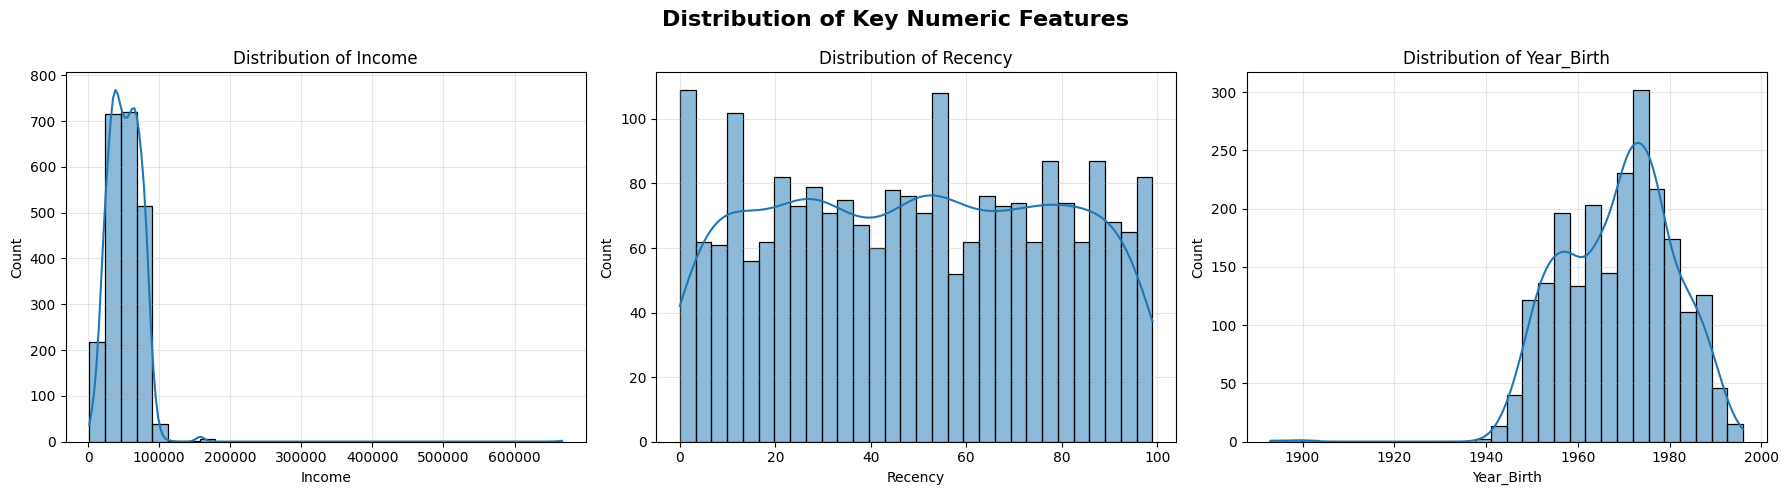

SUMMARY STATISTICS FOR KEY NUMERIC FEATURES
          Income  Recency  Year_Birth
count    2216.00  2216.00     2216.00
mean    52247.25    49.01     1968.82
std     25173.08    28.95       11.99
min      1730.00     0.00     1893.00
25%     35303.00    24.00     1959.00
50%     51381.50    49.00     1970.00
75%     68522.00    74.00     1977.00
max    666666.00    99.00     1996.00


In [60]:
# Plot distributions for key numeric features (optimized - no missing data)
numeric_cols = ["Income", "Recency", "Year_Birth"]

# Create subplots for better visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Distribution of Key Numeric Features", fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("SUMMARY STATISTICS FOR KEY NUMERIC FEATURES")
print("=" * 55)
summary_stats = df[numeric_cols].describe()
print(summary_stats.round(2))

## Categorical features countplots

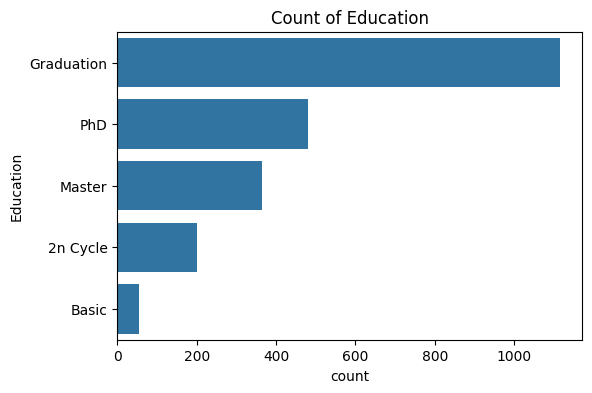

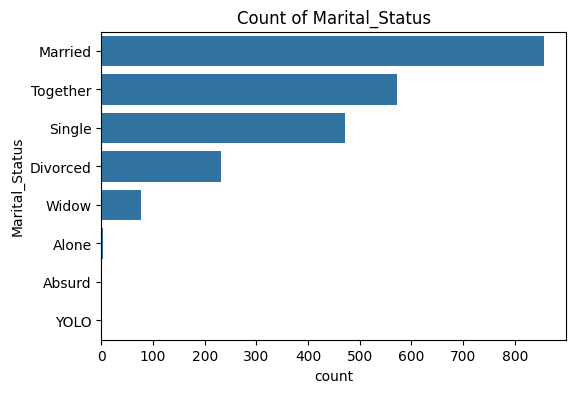

In [61]:
cat_cols = ["Education", "Marital_Status"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

In [62]:
# Get detailed statistics for categorical variables
print("Education Level Distribution:")
education_counts = df["Education"].value_counts()
education_percentages = df["Education"].value_counts(normalize=True) * 100
for level, count in education_counts.items():
    percentage = education_percentages[level]
    print(f"  {level}: {count} customers ({percentage:.1f}%)")

print(f"\nTotal customers: {len(df)}")
print(f"Most common education level: {education_counts.index[0]} ({education_counts.iloc[0]} customers)")

print("\n" + "="*50)
print("Marital Status Distribution:")
marital_counts = df["Marital_Status"].value_counts()
marital_percentages = df["Marital_Status"].value_counts(normalize=True) * 100
for status, count in marital_counts.items():
    percentage = marital_percentages[status]
    print(f"  {status}: {count} customers ({percentage:.1f}%)")

print(f"\nMost common marital status: {marital_counts.index[0]} ({marital_counts.iloc[0]} customers)")

Education Level Distribution:
  Graduation: 1116 customers (50.4%)
  PhD: 481 customers (21.7%)
  Master: 365 customers (16.5%)
  2n Cycle: 200 customers (9.0%)
  Basic: 54 customers (2.4%)

Total customers: 2216
Most common education level: Graduation (1116 customers)

Marital Status Distribution:
  Married: 857 customers (38.7%)
  Together: 573 customers (25.9%)
  Single: 471 customers (21.3%)
  Divorced: 232 customers (10.5%)
  Widow: 76 customers (3.4%)
  Alone: 3 customers (0.1%)
  Absurd: 2 customers (0.1%)
  YOLO: 2 customers (0.1%)

Most common marital status: Married (857 customers)


### Bivariate Analysis

#### Income vs Response

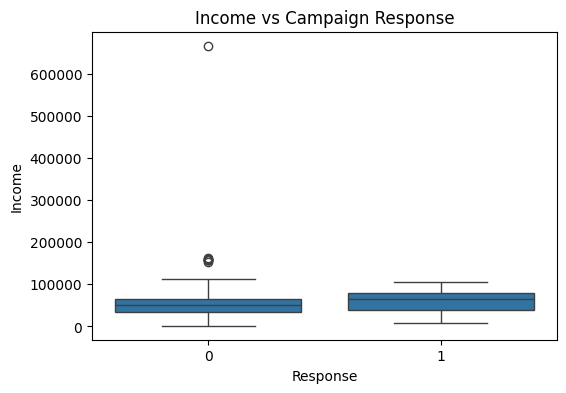

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Income vs Campaign Response")
plt.show()

In [64]:
# Detailed analysis of Income vs Response relationship
print("Income vs Campaign Response Analysis:")
print("="*45)

# Group by Response to get statistics
response_groups = df.groupby('Response')['Income']

print("Statistical Summary by Response:")
for response, group in response_groups:
    response_label = "Did NOT respond" if response == 0 else "DID respond"
    print(f"\n{response_label} (Response = {response}):")
    print(f"  Count: {len(group)} customers")
    print(f"  Mean Income: ${group.mean():,.2f}")
    print(f"  Median Income: ${group.median():,.2f}")
    print(f"  Standard Deviation: ${group.std():,.2f}")
    print(f"  Min Income: ${group.min():,.2f}")
    print(f"  Max Income: ${group.max():,.2f}")

# Calculate response rates by income quartiles
print(f"\n{'='*45}")
print("Response Rate by Income Quartiles:")
df['Income_Quartile'] = pd.qcut(df['Income'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
quartile_response = df.groupby('Income_Quartile')['Response'].agg(['count', 'sum', 'mean'])
quartile_response.columns = ['Total_Customers', 'Responders', 'Response_Rate']
quartile_response['Response_Rate_Pct'] = quartile_response['Response_Rate'] * 100

for quartile in quartile_response.index:
    row = quartile_response.loc[quartile]
    print(f"{quartile}: {row['Response_Rate_Pct']:.1f}% response rate ({row['Responders']}/{row['Total_Customers']} customers)")

# Overall response rate
overall_response_rate = df['Response'].mean() * 100
print(f"\nOverall Response Rate: {overall_response_rate:.1f}%")

Income vs Campaign Response Analysis:
Statistical Summary by Response:

Did NOT respond (Response = 0):
  Count: 1883 customers
  Mean Income: $50,839.13
  Median Income: $50,150.00
  Standard Deviation: $25,252.80
  Min Income: $1,730.00
  Max Income: $666,666.00

DID respond (Response = 1):
  Count: 333 customers
  Mean Income: $60,209.68
  Median Income: $64,090.00
  Standard Deviation: $23,194.08
  Min Income: $7,500.00
  Max Income: $105,471.00

Response Rate by Income Quartiles:
Q1 (Lowest): 10.5% response rate (58.0/554.0 customers)
Q2: 12.5% response rate (69.0/554.0 customers)
Q3: 10.3% response rate (57.0/554.0 customers)
Q4 (Highest): 26.9% response rate (149.0/554.0 customers)

Overall Response Rate: 15.0%


C:\Users\Juliana\AppData\Local\Temp\ipykernel_2904\4251466070.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_response = df.groupby('Income_Quartile')['Response'].agg(['count', 'sum', 'mean'])


### Correlation Heatmap

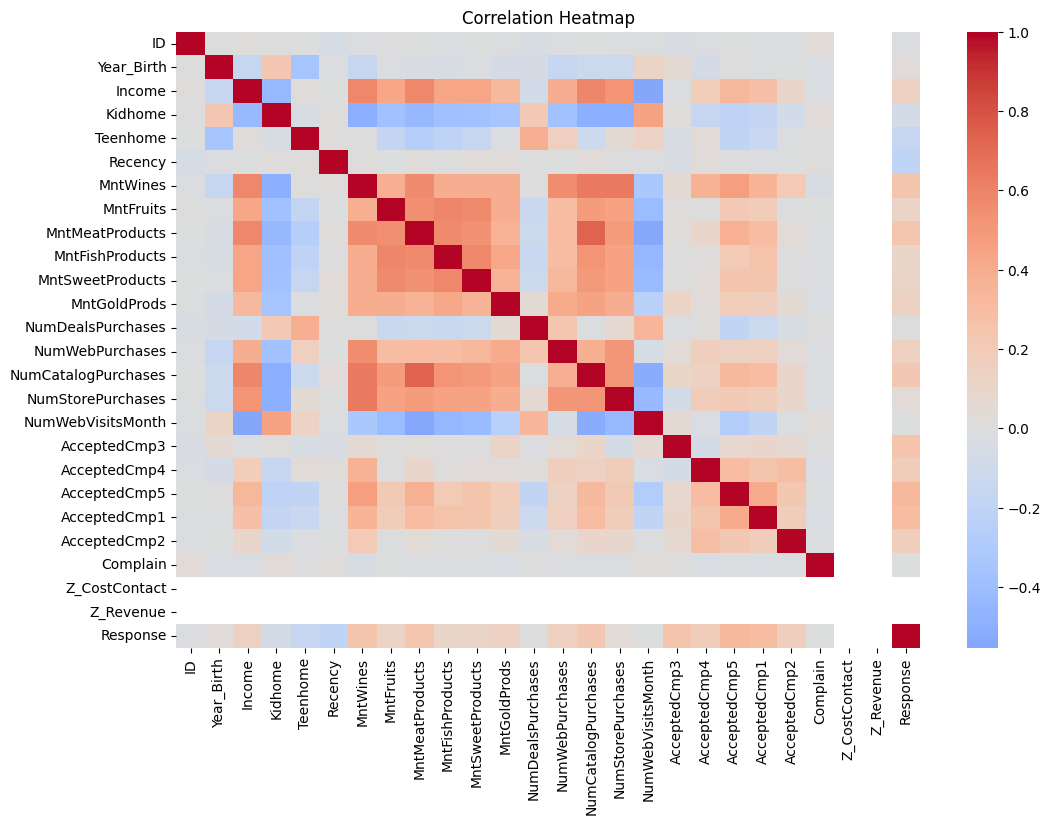

In [65]:
plt.figure(figsize=(12,8))
num_df = df.select_dtypes(include=np.number)
if num_df.empty:
    print("No numeric columns available for correlation.")
else:
    corr = num_df.corr()
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.show()

In [66]:
# Detailed correlation analysis
print("CORRELATION HEATMAP ANALYSIS")
print("="*50)

# Get the correlation matrix
correlation_matrix = num_df.corr()

# Find strongest positive correlations (excluding perfect correlations with self)
print("STRONGEST POSITIVE CORRELATIONS (> 0.5):")
print("-"*45)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
strong_positive = upper_triangle[upper_triangle > 0.5].stack().sort_values(ascending=False)

for (var1, var2), corr_value in strong_positive.head(10).items():
    print(f"{var1} ↔ {var2}: {corr_value:.3f}")

print(f"\nSTRONGEST NEGATIVE CORRELATIONS (< -0.3):")
print("-"*45)
strong_negative = upper_triangle[upper_triangle < -0.3].stack().sort_values()

for (var1, var2), corr_value in strong_negative.head(10).items():
    print(f"{var1} ↔ {var2}: {corr_value:.3f}")

# Response variable correlations
print(f"\nRESPONSE VARIABLE CORRELATIONS:")
print("-"*45)
response_corr = correlation_matrix['Response'].drop('Response').sort_values(key=abs, ascending=False)
print("Variables most correlated with Campaign Response:")
for var, corr_value in response_corr.head(10).items():
    direction = "Positive" if corr_value > 0 else "Negative"
    print(f"  {var}: {corr_value:.3f} ({direction})")

# Income correlations
print(f"\nINCOME CORRELATIONS:")
print("-"*30)
income_corr = correlation_matrix['Income'].drop('Income').sort_values(key=abs, ascending=False)
print("Variables most correlated with Income:")
for var, corr_value in income_corr.head(8).items():
    direction = "Positive" if corr_value > 0 else "Negative"
    print(f"  {var}: {corr_value:.3f} ({direction})")

CORRELATION HEATMAP ANALYSIS
STRONGEST POSITIVE CORRELATIONS (> 0.5):
---------------------------------------------
MntMeatProducts ↔ NumCatalogPurchases: 0.734
MntWines ↔ NumStorePurchases: 0.640
MntWines ↔ NumCatalogPurchases: 0.635
MntFruits ↔ MntFishProducts: 0.593
Income ↔ NumCatalogPurchases: 0.589
Income ↔ MntMeatProducts: 0.585
MntFishProducts ↔ MntSweetProducts: 0.584
Income ↔ MntWines: 0.579
MntMeatProducts ↔ MntFishProducts: 0.574
MntFruits ↔ MntSweetProducts: 0.572

STRONGEST NEGATIVE CORRELATIONS (< -0.3):
---------------------------------------------
Income ↔ NumWebVisitsMonth: -0.553
MntMeatProducts ↔ NumWebVisitsMonth: -0.539
NumCatalogPurchases ↔ NumWebVisitsMonth: -0.522
Kidhome ↔ NumCatalogPurchases: -0.505
Kidhome ↔ NumStorePurchases: -0.501
Kidhome ↔ MntWines: -0.497
MntFishProducts ↔ NumWebVisitsMonth: -0.446
Kidhome ↔ MntMeatProducts: -0.439
NumStorePurchases ↔ NumWebVisitsMonth: -0.432
Income ↔ Kidhome: -0.429

RESPONSE VARIABLE CORRELATIONS:
-------------------

### Feature Engineering (optional preview)

In [67]:
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["TotalMnt"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)
df["Customer_Tenure_Days"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

print("\nNew engineered columns added: ['Children', 'TotalMnt', 'Customer_Tenure_Days']")



New engineered columns added: ['Children', 'TotalMnt', 'Customer_Tenure_Days']


### Quick Summary Insights

In [68]:
print("\nAverage income:", round(df["Income"].mean(), 2))
print("Average total spending:", round(df["TotalMnt"].mean(), 2))
print("Average recency (days since last purchase):", round(df["Recency"].mean(), 2))
print("Average customer tenure (days):", round(df["Customer_Tenure_Days"].mean(), 2))



Average income: 52247.25
Average total spending: 607.08
Average recency (days since last purchase): 49.01
Average customer tenure (days): 353.52


In [69]:
# Get descriptive statistics for Year_Birth
print("Year_Birth Statistics:")
print(f"Mean: {df['Year_Birth'].mean():.0f}")
print(f"Median: {df['Year_Birth'].median():.0f}")
print(f"Standard Deviation: {df['Year_Birth'].std():.1f}")
print(f"Minimum: {df['Year_Birth'].min()}")
print(f"Maximum: {df['Year_Birth'].max()}")
print(f"Range: {df['Year_Birth'].max() - df['Year_Birth'].min()} years")

# Calculate ages (assuming current year is 2025)
current_year = 2025
ages = current_year - df['Year_Birth']
print(f"\nAge Statistics (as of {current_year}):")
print(f"Mean Age: {ages.mean():.1f} years")
print(f"Median Age: {ages.median():.0f} years")
print(f"Youngest Customer: {ages.min()} years old")
print(f"Oldest Customer: {ages.max()} years old")

print(f"\nQuartiles for Year_Birth:")
print(df['Year_Birth'].quantile([0.25, 0.5, 0.75]))

Year_Birth Statistics:
Mean: 1969
Median: 1970
Standard Deviation: 12.0
Minimum: 1893
Maximum: 1996
Range: 103 years

Age Statistics (as of 2025):
Mean Age: 56.2 years
Median Age: 55 years
Youngest Customer: 29 years old
Oldest Customer: 132 years old

Quartiles for Year_Birth:
0.25    1959.0
0.50    1970.0
0.75    1977.0
Name: Year_Birth, dtype: float64


Created new feature "Living_with" out of "Marital_Status" to extract the living situation of couples.

In [70]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

Add new feature "Children" to indicate total children in household (kid + Teen).

In [71]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Add new feature "Family_size".

In [72]:
# Family_size: 1 if Alone, 2 if Partner, plus number of children
df['Family_size'] = df['Children'] + 1 + df['Living_with'].eq('Partner').astype('int8')


Add new feature "Is_parent" indicating parenthood status.

In [73]:
df['Is_parent'] = np.where(df.Children > 0, 1, 0)

Simplify values of "Education". (In three groups)

In [74]:
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

Add new feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [75]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [76]:
# For clarity
df =df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [77]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Income_Quartile', 'Children', 'TotalMnt', 'Customer_Tenure_Days',
       'Living_with', 'Family_size', 'Is_parent', 'Spent'],
      dtype='object')

In [78]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Income_Quartile,Children,TotalMnt,Customer_Tenure_Days,Living_with,Family_size,Is_parent,Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,Q3,0,1617,663,Alone,1,0,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,Q2,2,27,113,Alone,3,1,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,Q4 (Highest),0,776,312,Partner,2,0,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,Q1 (Lowest),1,53,139,Partner,3,1,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,Q3,1,422,161,Partner,3,1,422


In [79]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Complain,Z_CostContact,Z_Revenue,Response,Children,TotalMnt,Customer_Tenure_Days,Family_size,Is_parent,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.009477,3.0,11.0,0.150271,0.947202,607.075361,353.521209,2.592509,0.714350,607.075361
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.0,11.0,0.000000,0.000000,69.000000,180.000000,2.000000,0.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,3.0,11.0,0.000000,1.000000,396.500000,355.500000,3.000000,1.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,3.0,11.0,0.000000,1.000000,1048.000000,529.000000,3.000000,1.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,699.000000,5.000000,1.000000,2525.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.096907,0.0,0.0,0.357417,0.749062,602.900476,202.434667,0.905722,0.451825,602.900476


Check Distribution of Data

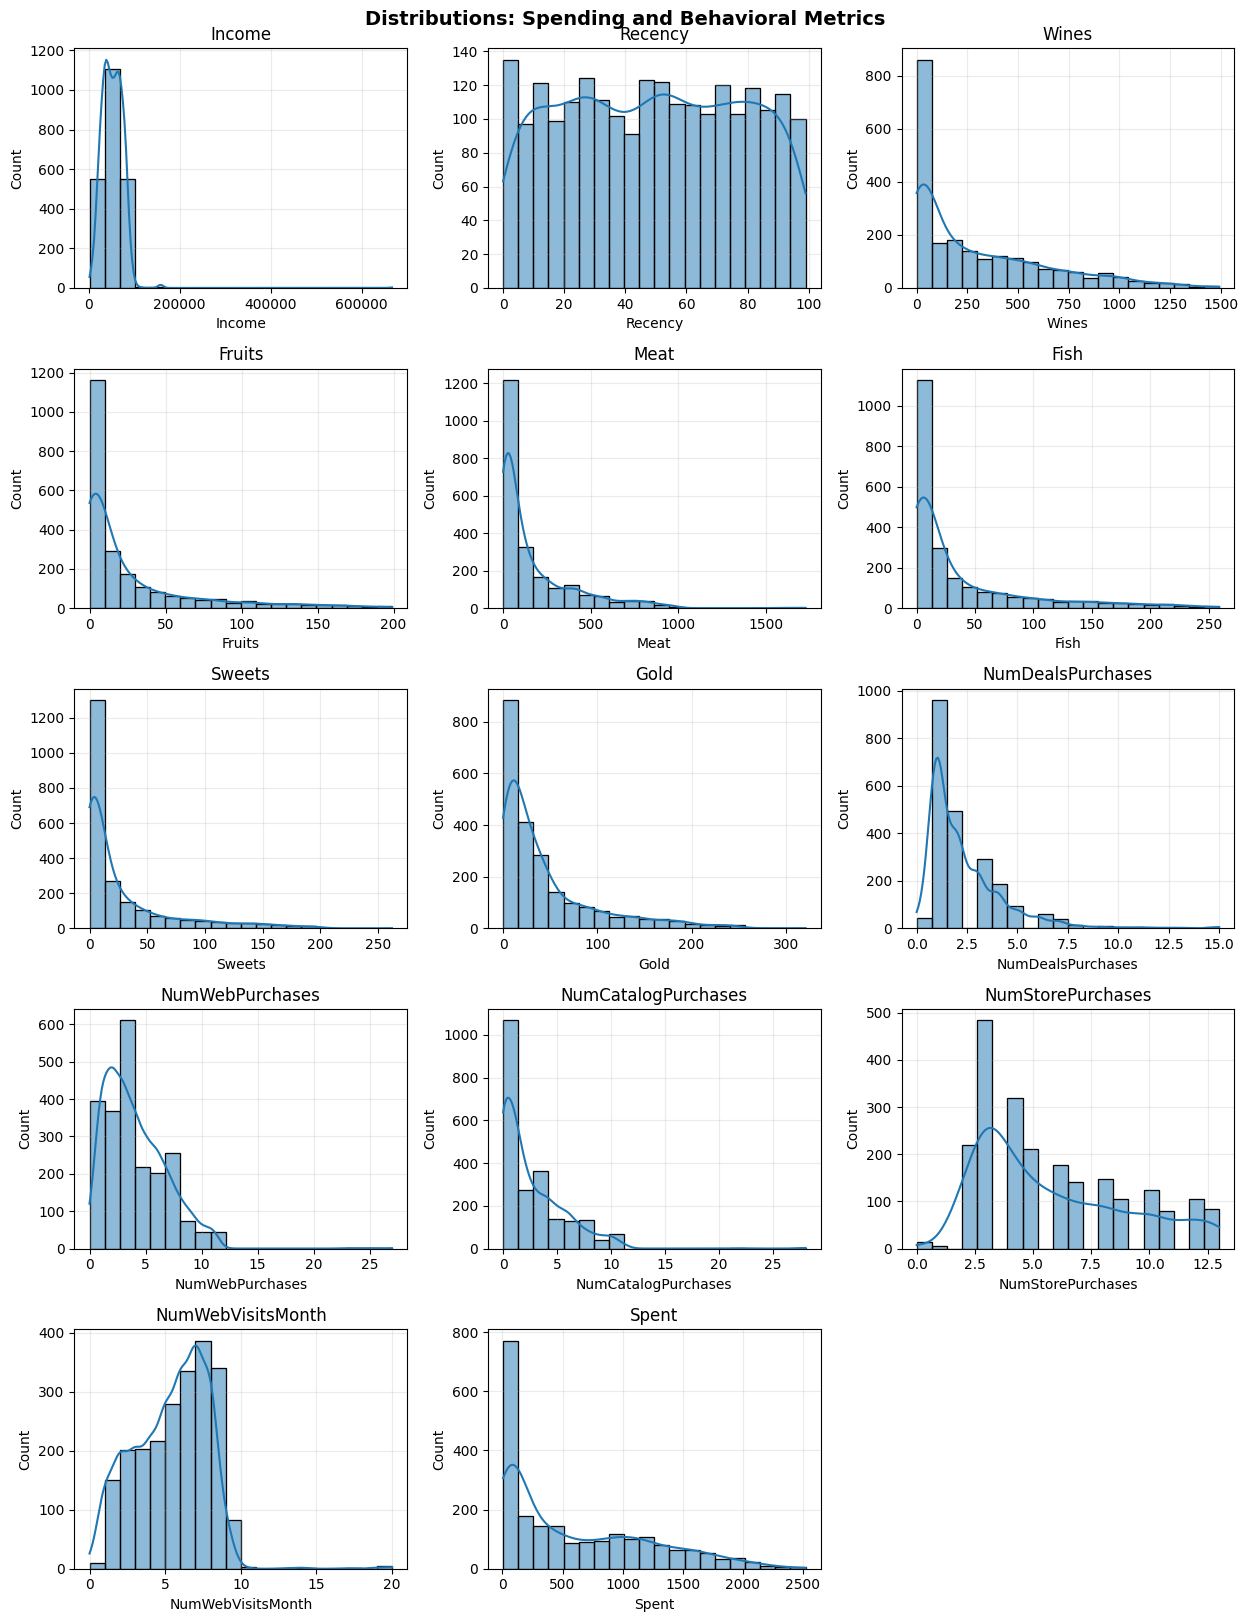

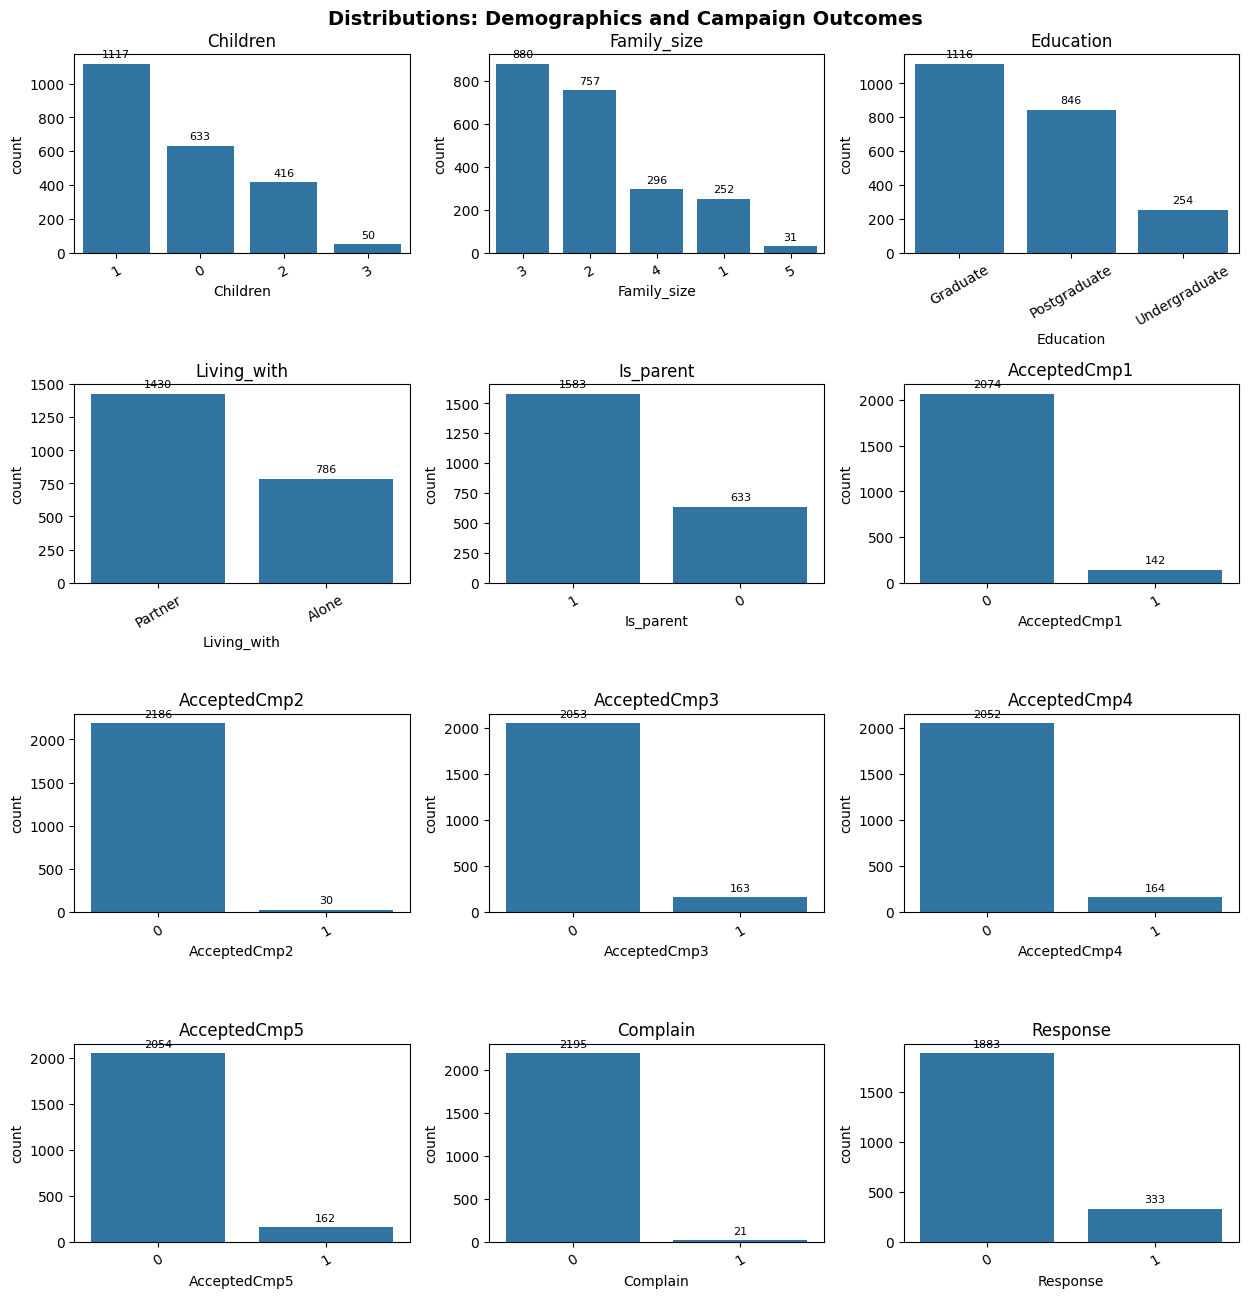

In [ ]:
import math

def plot_hist_grid(df, cols, ncols=3, bins=20, kde=True, title=None):
    rows = math.ceil(len(cols) / ncols)
    fig, axes = plt.subplots(rows, ncols, figsize=(ncols*4.2, rows*3.3))
    axes = np.array(axes).reshape(-1)  # flatten
    for i, col in enumerate(cols):
        ax = axes[i]
        sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax)
        ax.set_title(col)
        ax.grid(True, alpha=0.25)
    # hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    if title:
        fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def _annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, height),
                        ha='center', va='bottom', fontsize=8, xytext=(0,3), textcoords='offset points')

def plot_mixed_grid(df, cols, ncols=3, title=None):
    rows = math.ceil(len(cols) / ncols)
    fig, axes = plt.subplots(rows, ncols, figsize=(ncols*4.2, rows*3.3))
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(cols):
        ax = axes[i]
        series = df[col]
        is_numeric = pd.api.types.is_numeric_dtype(series)
        few_levels = series.nunique(dropna=True) <= 10
        if is_numeric and not few_levels:
            sns.histplot(data=df, x=col, bins=20, kde=True, ax=ax)
            ax.grid(True, alpha=0.25)
        else:
            sns.countplot(data=df, x=col, ax=ax, order=series.value_counts().index)
            ax.tick_params(axis='x', rotation=30)
            _annotate_bars(ax)
        ax.set_title(col)
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    if title:
        fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ---- Distributions: spending and behavior (numeric) ----
numeric_cols = [
    'Income','Recency','Wines','Fruits','Meat','Fish','Sweets','Gold',
    'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
    'NumWebVisitsMonth','Spent'
]
plot_hist_grid(df, numeric_cols, ncols=3, bins=20, kde=True,
               title='Distributions: Spending and Behavioral Metrics')

# ---- Mixed grid: demographics and campaign flags ----
mixed_cols = [
    'Children','Family_size','Education','Living_with','Is_parent',
    'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
    'Complain','Response'
]
plot_mixed_grid(df, mixed_cols, ncols=3, title='Distributions: Demographics and Campaign Outcomes')